In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup



In [2]:
url = "https://www.flipkart.com/search?q=electronics&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page={}"

In [3]:

url1 = "https://www.flipkart.com/search?q=electronics&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY"

In [4]:

data = {
        'Product Name': [],
        'Original Price': [],
        'Discounted price': [],
        'Discount(%)': [],
        'Rating': []
       }

In [5]:
resp = requests.get(url1)
resp.status_code

200

In [6]:
soup = BeautifulSoup(resp.text, 'html.parser')

In [7]:
names = [ i.text.split('(')[0] for i in soup.find_all('a', attrs={'class': 's1Q9rs'}) ]
len(names)

40

In [8]:
#Product_Name, Original_Price, Discount_Price, Discount(%), Rating.

op = [ i.text.replace('₹', '') for i in soup.find_all('div', attrs={'class': '_3I9_wc'}) ]
len(op)

40

In [9]:
dp = [ i.text.replace('₹', '') for i in soup.find_all('div', attrs={'class': '_30jeq3'}) ]
final = dp[:-5]

len(final)

40

In [10]:
dis = [ i.span.text.replace('% off', '') for i in soup.find_all('div', attrs={'class': '_3Ay6Sb'}) ]
result = dis[:-5]
len(result)


40

In [11]:
import numpy as np

In [12]:
rating = [ i.text for i in soup.find_all('div', attrs={'class': '_3LWZlK'}) ]
len(rating)


54

In [13]:
name = []
op1 = []
dp1 = []
disc = []
ratings = []

In [14]:
def get_content(start, end):
    url = "https://www.flipkart.com/search?q=electronics&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page={}"
    e_page = []
    for a in tqdm.tqdm(range(start, end+1)):
        resp = requests.get(url.format(a, a))
        if resp.status_code == 200:
            context = resp.text
            soup = BeautifulSoup(context, 'html.parser')
            names = [ i.text.split('(')[0] for i in soup.find_all('a', attrs={'class': 's1Q9rs'}) ]
            name.extend(names)
            op = [ i.text.replace('₹', '') for i in soup.find_all('div', attrs={'class': '_3I9_wc'}) ]
            op1.extend(op)
            dp = [ i.text.replace('₹', '') for i in soup.find_all('div', attrs={'class': '_30jeq3'}) ]
            final = dp[:-5]
            dp1.extend(final)
            dis = [ i.span.text.replace('% off', '') for i in soup.find_all('div', attrs={'class': '_3Ay6Sb'}) ]
            result = dis[:-5]
            disc.extend(result)
            rating = [ i.text for i in soup.find_all('div', attrs={'class': '_3LWZlK'}) ]
            ratings.extend(rating)
        elif resp.status_code != 200:
            e_page.append(a)
        else:
            print(f"!Error {resp.status_code} and reason {resp.reason}. ")
            break
    return data, e_page

In [15]:
import tqdm
data, error_page = get_content(1, 25)

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:39<00:00,  1.59s/it]


In [16]:
a, b, c, d, e = len(name), len(op1), len(dp1), len(disc), len(ratings)
m1 = min(a, b, c, d, e)

In [17]:
print(len(name[:m1]))
print(len(op1[:m1]))
print(len(dp1[:m1]))
print(len(disc[:m1]))
print(len(ratings[:m1]))

980
980
980
980
980


In [18]:
data = {
        'Product Name': name[:m1],
        'Original Price': op1[:m1], 
        'Discounted price': dp1[:m1],
        'Discount(%)': disc[:m1],
        'Rating': ratings[:m1] 
       }

In [19]:
df = pd.DataFrame(data)
df

,Product Name,Original Price,Discounted price,Discount(%),Rating
0,Bajaj GX1 500 W Mixer Grinder,"3,505","2,099",40,4.2
1,Mi XXQ02HM Runtime: 60 min Trimmer for Men,"1,199","1,099",8,4.3
2,BAJAJ Majesty DX 6 1000 W Dry Iron,920,649,29,4.3
3,PHILIPS BT1232/15 Runtime: 30 mins Trimmer fo...,935,897,4,4.2
4,BAJAJ Majesty DX 11 1000 W Dry Iron,785,480,38,4.2
...,...,...,...,...,...
975,Blaupunkt Cybersound 80 cm,"17,990",240,76,5
976,Syska Power Wheel 3 Socket Extension Boards,"39,000","12,890",25,2
977,Tata Sky Company Replaced HD Recording TATA SK...,399,305,1,4.1
978,Whirlpool 190 L Direct Cool Single Door 2 Star...,"24,990","4,999",69,4


In [20]:
df.shape

(980, 5)

<AxesSubplot:>

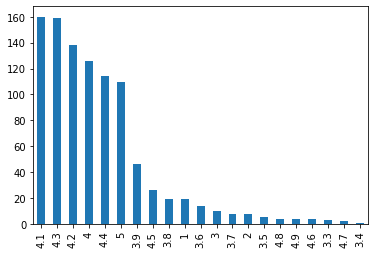

In [21]:
df['Rating'].value_counts().plot(kind= 'bar')

<AxesSubplot:ylabel='Rating'>

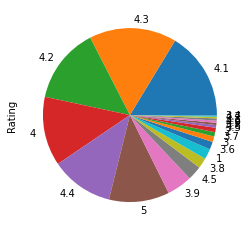

In [22]:
df['Rating'].value_counts().plot(kind= 'pie')